**PERFORMANCE APPRAISAL SCORES**

After designing the models for day to day usage, we need to check how efficient our models are for real world predictions.

So we use different appraisal methods to check the efficiency of the models.

Since the problem statements are different, we cannot use the same metrics for all the appraisals.

**REGRESSION MODEL APPRAISAL**

- Accuracy score
- Root Square Mean Error
- Mean Square Error
- Mean Absolute Error

**CLASSIFICATION MODEL APPRAISAL**

- Recall
- Precision
- F1 Score
- ROC AOC Curve
- Classification report
- Confusion Metrix

In [65]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_iris, load_diabetes
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
%matplotlib inline

**STUDY OF REGRESSION MODEL**

In [66]:
# Dataset Preparations
dataset = load_diabetes()
Xdata = dataset.data
Ydata = dataset.target

In [67]:
# Splitting of dataset
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(Xdata,Ydata,test_size=0.3,random_state=101)
Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape

((309, 10), (133, 10), (309,), (133,))

In [68]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xtrain,Ytrain)
Ypredictions = lr.predict(Xtest)

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**MEAN SQUARED ERROR**

MSE = avg [(Y Actual - Y Predicted)^2]

In [70]:
print(f'Mean Squared Error for the model is  {mean_squared_error(Ytest,Ypredictions)}')

Mean Squared Error for the model is  3365.0759915425383


**MEAN ABSOLUTE ERROR**

MAE = avg (abs(Y Actual - Y Predicted))

In [71]:
print(f'Mean Absolute Error for the model is  {mean_absolute_error(Ytest,Ypredictions)}')

Mean Absolute Error for the model is  46.021951395698274


**ROOT MEAN SQUARED ERROR**

RMSE = SQRT[avg [(Y Actual - Y Predicted)^2]]



In [72]:
print(f'Root Mean Squared Error for the model is  {np.sqrt(mean_absolute_error(Ytest,Ypredictions))}')

Root Mean Squared Error for the model is  6.783948068470032


**R2 Score**

R-squared = Explained variation / Total variation

In [73]:
print(f'R2 Score for the model is  {r2_score(Ytest,Ypredictions)}')

R2 Score for the model is  0.45767674177195583


**STUDY OF CLASSIFICATION MODEL**

In [25]:
# Dataset Preparations
dataset = load_iris()
Xdata = dataset.data
Ydata = dataset.target

In [26]:
Xdata.shape, Ydata.shape

((150, 4), (150,))

In [27]:
# Splitting of dataset
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(Xdata,Ydata,test_size=0.3,random_state=101)
Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape

((105, 4), (45, 4), (105,), (45,))

In [28]:
# Scaling of data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xtrain = ss.fit_transform(Xtrain)
Xtest = ss.transform(Xtest)

In [29]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain,Ytrain)
Ypredictions = lr.predict(Xtest)

In [30]:
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score

**Accuracy Score**

score = (True Positive + True Negative) / (true positive + true negative + false positive + false Negative)

In [31]:
print(f'Accuracy score of the model is {accuracy_score(Ypredictions,Ytest)}')

Accuracy score of the model is 0.9777777777777777


**Recall Score**

Recall score = true positive / (true positve + false negative)

In [35]:
print(f'Recall score of the model is {recall_score(Ypredictions,Ytest,average="weighted")}')

Recall score of the model is 0.9777777777777777


**Precision Score**

Precision score = true positive / [true postive + false postive]

In [36]:
print(f'Presicion score of the model is {precision_score(Ypredictions,Ytest,average="weighted")}')

Presicion score of the model is 0.9788888888888888


**F1 Score**

Harmonic Mean of Recall and Precision
F1 score  = 2* [Recall * Precision ]/[Recall + Precision]

In [38]:
print(f'F1 score of the model is {f1_score(Ypredictions,Ytest,average="weighted")}')

F1 score of the model is 0.9776182336182336


**Classification Report**

In [39]:
from sklearn.metrics import classification_report
print(classification_report(Ypredictions,Ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      1.00      0.97        19
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



**Confusion Matrix**

In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ypredictions,Ytest))

[[13  0  0]
 [ 0 19  0]
 [ 0  1 12]]


**ROC AOC Curve**

- ROC -> Receiver operating Characteristic Curve is the curve plotted between Sensitivity Vs [1 - Specificity]

- Sensitivity is the True Positive Rate -> TP / (TP + FN)

- Specificity is the True Negative rate -> TN/(TN + FP)

- 1-Specificity -> FP / (TN + FP)

- AUC -> Area under Curve is the ability of the classifier to classify the various classes



In [44]:
# Import some data to play with
iris = load_iris()
X = iris.data
Y = iris.target

In [47]:
# Binarize the output
Y = label_binarize(Y, classes=[0, 1, 2])
n_classes = Y.shape[1]

In [48]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [49]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.5,
                                                    random_state=101)

In [57]:
# Learn to predict each class against the other
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,auc

classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [58]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [59]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

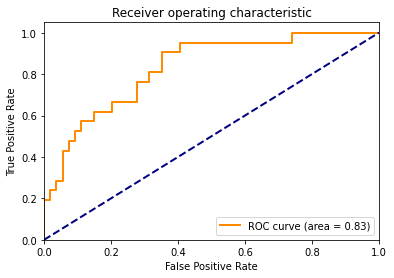

In [62]:
# Plot of graph "Sensitivity(True Positive rate) Vs 1-Specificity"
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()